In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
file_path = "/content/dataset_exoplanets.csv"
df = pd.read_csv(file_path, skiprows=96)



In [ ]:
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,Densité de la planète (kg/m3)
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14,NaN
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23,NaN
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19,NaN
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06,NaN
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14,NaN


In [ ]:
colonnes = df.columns.tolist()

In [ ]:
print(colonnes)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [ ]:
df.shape

(38449, 92)

In [ ]:
colonnes_utiles = [
    "pl_name", # nom de la planète
    "hostname", # nom de l'étoile
    "default_flag", # fiabilité découverte
    "sy_snum", # nombre d'étoiles
    "sy_pnum", # nombre de planète
    "pl_rade", # rayon de la planète
    "pl_bmasse", # masse de la planète
    "pl_eqt", # température planète
    "pl_insol", # flux d'énergie
    "st_teff", # température de l'étoile
    "st_mass", # masse de l'étoile
    "st_rad", # rayon étoile
    "pl_orbper", # periode orbitale
    "pl_orbsmax", # demi-grand axe
    "discoverymethod", # méthode de détection
    "disc_year", # année de découverte

]



In [ ]:
print(df.columns.tolist())

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [ ]:
df_filtrer = df[colonnes_utiles]

In [ ]:
df_filtrer.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_rade,pl_bmasse,pl_eqt,pl_insol,st_teff,st_mass,st_rad,pl_orbper,pl_orbsmax,discoverymethod,disc_year
0,11 Com b,11 Com,0,2,1,NaN,6165.600000,NaN,NaN,4742.0,2.70,19.00,326.03000,1.290,Radial Velocity,2007
1,11 Com b,11 Com,0,2,1,NaN,5434.700000,NaN,NaN,NaN,2.60,NaN,NaN,1.210,Radial Velocity,2007
2,11 Com b,11 Com,1,2,1,NaN,4914.898486,NaN,NaN,4874.0,2.09,13.76,323.21000,1.178,Radial Velocity,2007
3,11 UMi b,11 UMi,1,1,1,NaN,4684.814200,NaN,NaN,4213.0,2.78,29.79,516.21997,1.530,Radial Velocity,2009
4,11 UMi b,11 UMi,0,1,1,NaN,3337.070000,NaN,NaN,4340.0,1.80,24.08,516.22000,1.540,Radial Velocity,2009


In [ ]:
df_filtrer.rename(columns={
    "pl_name": "Nom planète",
    "hostname": "Nom étoile",
    "default_flag": "Fiabilité découverte",
    "sy_snum": "Nombre d'étoiles",
    "sy_pnum": "Nombre de planètes",
    "pl_rade": "Rayon de la planète",
    "pl_bmasse": "Masse de la planète",
    "pl_eqt": "Température planète",
    "st_teff": "Température étoile",
    "st_mass": "Masse de l'étoile",
    "st_rad": "Rayon de l'étoile",
    "pl_orbper": "Période orbitale",
    "pl_orbsmax": "Demi-grand axe",
    "pl_insol": "Flux d'énergie",
    "discoverymethod": "Méthode de découverte",
    "disc_year": "Année de découverte"
}, inplace=True)

<ipython-input-169-803e6c90dd72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrer.rename(columns={


In [ ]:
df_filtrer.head()

,Nom planète,Nom étoile,Fiabilité découverte,Nombre d'étoiles,Nombre de planètes,Rayon de la planète,Masse de la planète,Température planète,Flux d'énergie,Température étoile,Masse de l'étoile,Rayon de l'étoile,Période orbitale,Demi-grand axe,Méthode de découverte,Année de découverte
0,11 Com b,11 Com,0,2,1,NaN,6165.600000,NaN,NaN,4742.0,2.70,19.00,326.03000,1.290,Radial Velocity,2007
1,11 Com b,11 Com,0,2,1,NaN,5434.700000,NaN,NaN,NaN,2.60,NaN,NaN,1.210,Radial Velocity,2007
2,11 Com b,11 Com,1,2,1,NaN,4914.898486,NaN,NaN,4874.0,2.09,13.76,323.21000,1.178,Radial Velocity,2007
3,11 UMi b,11 UMi,1,1,1,NaN,4684.814200,NaN,NaN,4213.0,2.78,29.79,516.21997,1.530,Radial Velocity,2009
4,11 UMi b,11 UMi,0,1,1,NaN,3337.070000,NaN,NaN,4340.0,1.80,24.08,516.22000,1.540,Radial Velocity,2009


In [ ]:
# Calcul du taux de remplissage pour chaque colonne
taux_remplissage = df_filtrer.notnull().mean() * 100

In [ ]:
# Tri décroissant et affichage propre
taux_remplissage = taux_remplissage.sort_values(ascending=False)
print(taux_remplissage)

Nom planète              100.000000
Nom étoile               100.000000
Fiabilité découverte     100.000000
Nombre d'étoiles         100.000000
Nombre de planètes       100.000000
Année de découverte      100.000000
Méthode de découverte    100.000000
Rayon de l'étoile         92.267679
Période orbitale          91.669484
Température étoile        91.653879
Masse de l'étoile         84.899477
Rayon de la planète       68.974486
Demi-grand axe            56.297953
Température planète       43.663034
Masse de la planète       17.264428
dtype: float64


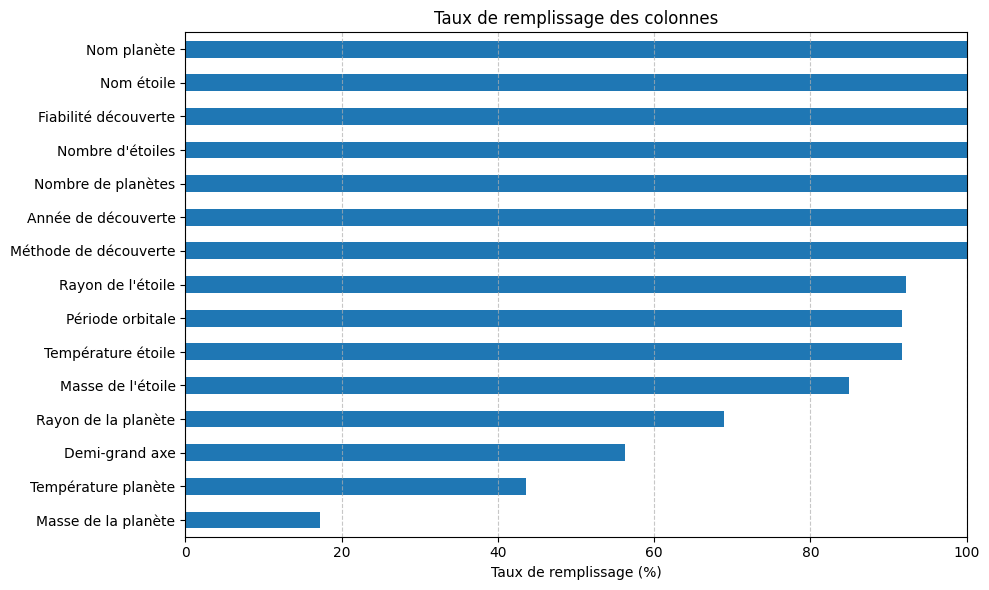

In [ ]:
plt.figure(figsize=(10, 6))
taux_remplissage.plot(kind='barh')
plt.xlabel("Taux de remplissage (%)")
plt.title("Taux de remplissage des colonnes")
plt.xlim(0, 100)
plt.gca().invert_yaxis() # pour avoir la colonne la plus remplie en haut
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
valeurs_nulles = df_filtrer.isnull().sum()
print(valeurs_nulles[valeurs_nulles > 0])

Rayon de la planète    11929
Masse de la planète    31811
Température planète    21661
Température étoile      3209
Masse de l'étoile       5806
Rayon de l'étoile       2973
Période orbitale        3203
Demi-grand axe         16803
dtype: int64


In [ ]:
valeurs_nulles_pct = df_filtrer.isnull().mean() * 100
print(valeurs_nulles_pct[valeurs_nulles_pct > 0])

Rayon de la planète    31.025514
Masse de la planète    82.735572
Température planète    56.336966
Température étoile      8.346121
Masse de l'étoile      15.100523
Rayon de l'étoile       7.732321
Période orbitale        8.330516
Demi-grand axe         43.702047
dtype: float64


In [ ]:
# Analyse des valeurs nulles
# Plusieurs colonnes du dataset présentent des valeurs nulles. Ces absences peuvent être expliquées par deux grandes causes :

# Absence logique de données : certaines mesures comme la masse,
# le rayon ou la température d’équilibre des exoplanètes nécessitent des observations très précises (transit, vitesse radiale, etc.).
# Si ces conditions ne sont pas réunies, la donnée ne peut tout simplement pas être estimée.
# C’est donc une absence naturelle et explicable scientifiquement.

# Manque de saisie ou données incomplètes : pour d'autres colonnes comme la méthode ou l’année de découverte,
# les valeurs nulles peuvent être dues à une mauvaise saisie, un oubli ou une incohérence dans la base de données.
# Ces champs devraient en théorie toujours être remplis.

In [ ]:
nb_planetes = df_filtrer["Nombre de planètes"].unique()
print(f"Nombre de planètes différentes découvertes: {nb_planetes}")

Nombre de planètes différentes découvertes: [1 2 3 5 4 6 8 7]


In [ ]:
# Filtrer les lignes où le système contient exactement 2 étoiles
systemes_doubles = df_filtrer[df_filtrer["Nombre d'étoiles"] == 2]

In [ ]:
# Identifier les systèmes uniques (on utilise ici le nom de l'étoile hôte comme identifiant)
nb_systemes_doubles = systemes_doubles["Nom étoile"].unique()

In [ ]:
print(f"Nombre de systèmes doubles (à deux étoiles): {nb_systemes_doubles}")

Nombre de systèmes doubles (à deux étoiles): ['11 Com' '18 Del' '2MASS J01033563-5515561 A' '2MASS J0249-0557 A'
 '2MASS J19383260+4603591' '42 Dra' '55 Cnc' '75 Cet' 'BD+05 4868 A'
 'CoRoT-2' 'CoRoT-9' 'DE CVn' 'DMPP-3 A' 'DP Leo' 'DS Tuc A'
 'EPIC 246851721' 'GJ 15 A' 'GJ 3021' 'GJ 3222' 'GJ 338 B' 'GJ 3473'
 'GJ 414 A' 'GJ 676 A' 'GJ 680' 'GJ 720 A' 'GJ 86' 'GJ 896 A' 'Gl 49'
 'Gl 725 A' 'HAT-P-1' 'HAT-P-14' 'HAT-P-22' 'HAT-P-24' 'HAT-P-27'
 'HAT-P-29' 'HAT-P-3' 'HAT-P-30' 'HAT-P-32' 'HAT-P-33' 'HAT-P-39'
 'HAT-P-4' 'HAT-P-41' 'HAT-P-67' 'HAT-P-7' 'HATS-30' 'HATS-37 A'
 'HATS-48 A' 'HATS-58 A' 'HATS-65' 'HATS-74 A' 'HD 100655' 'HD 101930'
 'HD 102365' 'HD 102956' 'HD 103774' 'HD 106515 A' 'HD 107148' 'HD 108341'
 'HD 109749' 'HD 110082' 'HIP 8541' 'HD 113996' 'HD 114729' 'HD 116029'
 'HD 11964' 'HD 125612' 'HD 133131 A' 'HD 133131 B' 'HD 142' 'HD 142022 A'
 'HD 147379' 'HD 147513' 'HD 147873' 'HD 156846' 'HD 16141' 'HD 16417'
 'HD 164509' 'HD 164595' 'HD 170469' 'HD 177830' 'HD 1806

In [ ]:
# Compter le nombre de planètes découvertes par année
decouvertes_par_an = df_filtrer['Année de découverte'].value_counts()

In [ ]:
# Trouver l'année avec le plus grand nombre de découvertes
annee_max = decouvertes_par_an.idxmax()
nb_max = decouvertes_par_an.max()

In [ ]:
print(f"L'année où le plus d'exoplanètes ont été découvertes est {annee_max}, avec {nb_max} découvertes. ")

L'année où le plus d'exoplanètes ont été découvertes est 2016, avec 13311 découvertes. 


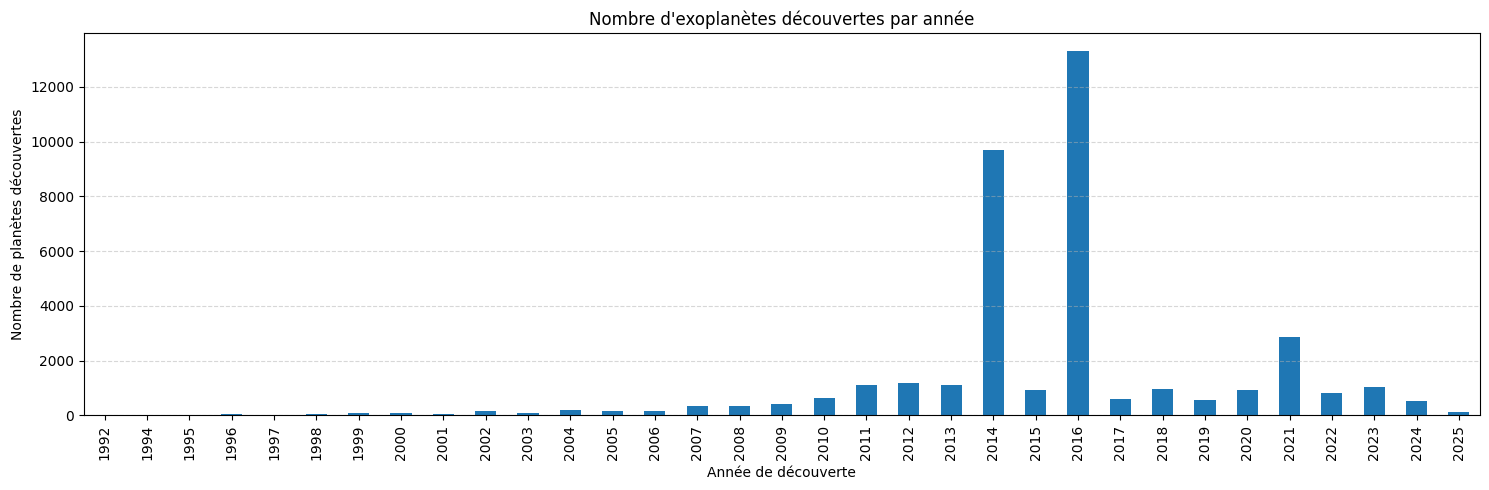

In [ ]:
# Tri des années dans l'ordre croissant
decouvertes_par_an.sort_index().plot(kind="bar", figsize=(15, 5))
plt.title("Nombre d'exoplanètes découvertes par année")
plt.xlabel("Année de découverte")
plt.ylabel("Nombre de planètes découvertes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Vérifie s'il y a des doublons (lignes strictement identiques)
doublons = df_filtrer.duplicated()

In [ ]:
# Combien de doublons ?
nb_doublons = doublons.sum()

In [ ]:
print(f"Nombre de doublons trouvés: {nb_doublons}")

Nombre de doublons trouvés: 5445


In [ ]:
# Affiche les lignes concernées (s'il y en a)
df_filtrer[doublons]

<ipython-input-151-d8a0bfd3866c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrer[doublons]


,Nom planète,Nom étoile,Fiabilité découverte,Nombre d'étoiles,Nombre de planètes,Rayon de la planète,Masse de la planète,Température planète,Température étoile,Masse de l'étoile,Rayon de l'étoile,Période orbitale,Demi-grand axe,Méthode de découverte,Année de découverte,planet_type


In [ ]:
# Suppression des doublons
df_filtrer = df_filtrer.drop_duplicates()

In [ ]:
# Vérification post-nettoyage
print(f"Nouvelle taille du dataset après suppression: {df_filtrer.shape}")

Nouvelle taille du dataset après suppression: (33004, 15)


In [ ]:
# Pour garantir la qualité du dataset,
# nous avons vérifié la présence de doublons,
# c’est-à-dire des lignes strictement identiques apparaissant plusieurs fois.
# Pour cela, nous avons utilisé la fonction duplicated() de pandas.

# Nous avons ensuite supprimé les doublons avec drop_duplicates().
# Cette étape est essentielle pour éviter de fausser les analyses statistiques (comme le comptage ou les moyennes),
# surtout si certaines planètes sont listées plusieurs fois par erreur.

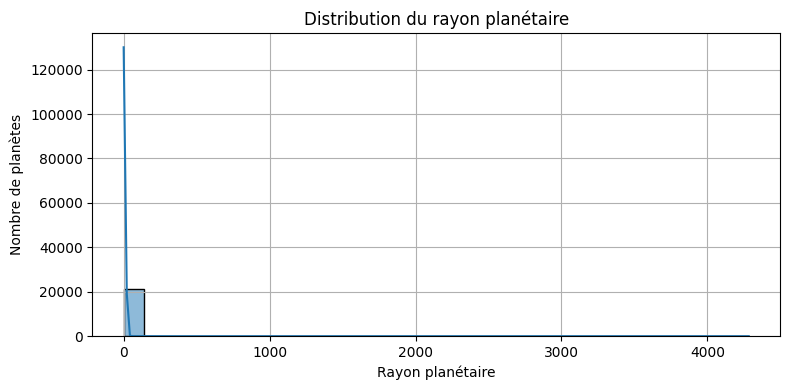

In [ ]:
# Distribution du rayon planétaire
plt.figure(figsize=(8, 4))
sns.histplot(df_filtrer["Rayon de la planète"], kde=True, bins=30)
plt.title("Distribution du rayon planétaire")
plt.xlabel("Rayon planétaire")
plt.ylabel("Nombre de planètes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Répétition pour chaque indicateur
colonnes_numeriques = [
    "Rayon de la planète",
    "Masse de la planète",
    "Température planète",
    "Température étoile",
    "Masse de l'étoile",
    "Rayon de l'étoile",
    "Période orbitale",
    "Demi-grand axe"
]

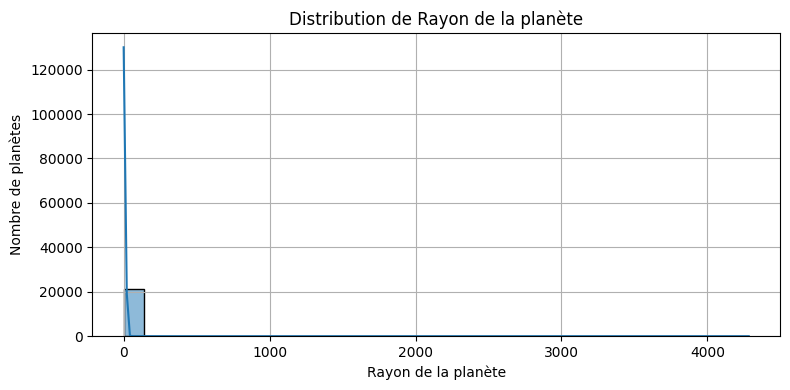

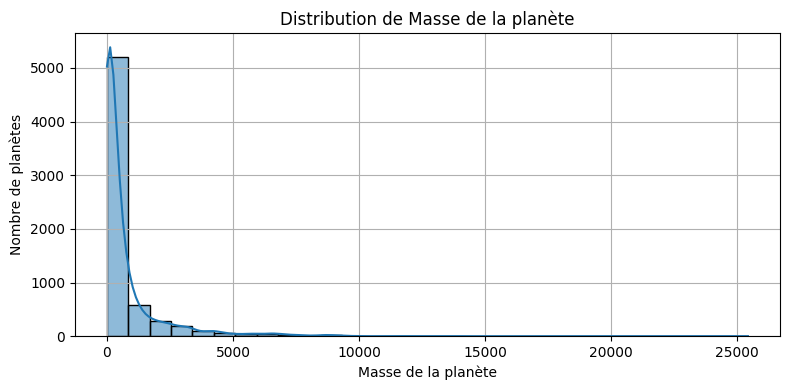

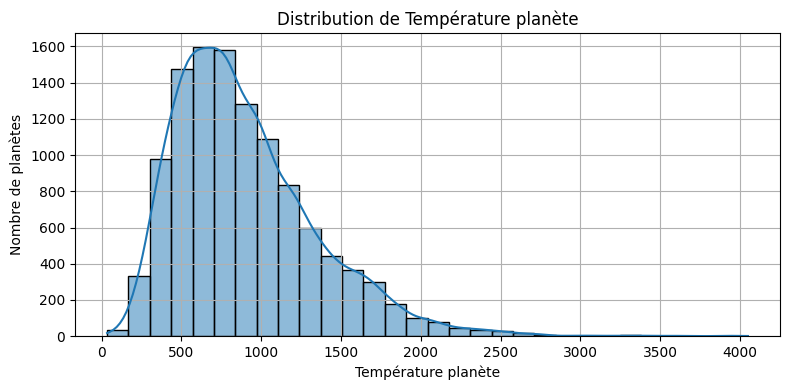

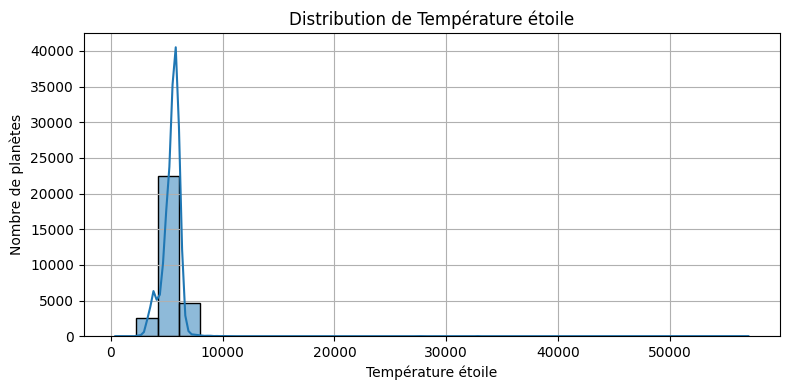

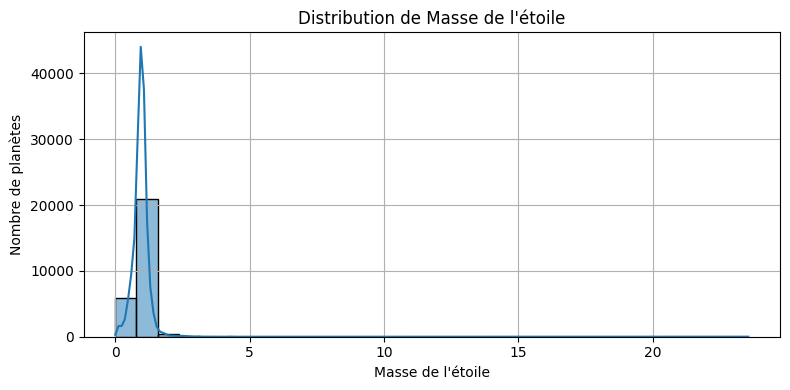

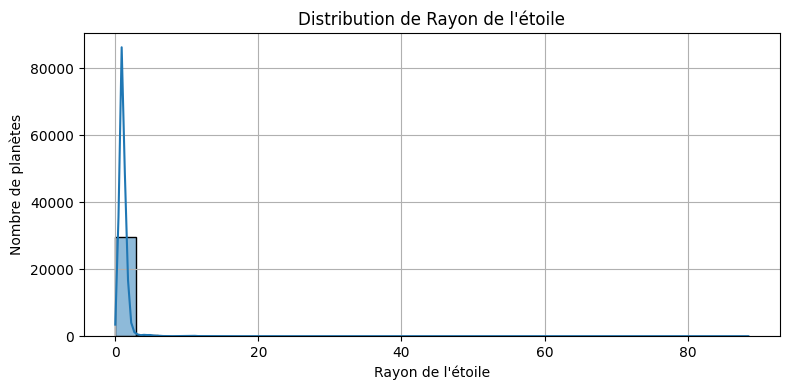

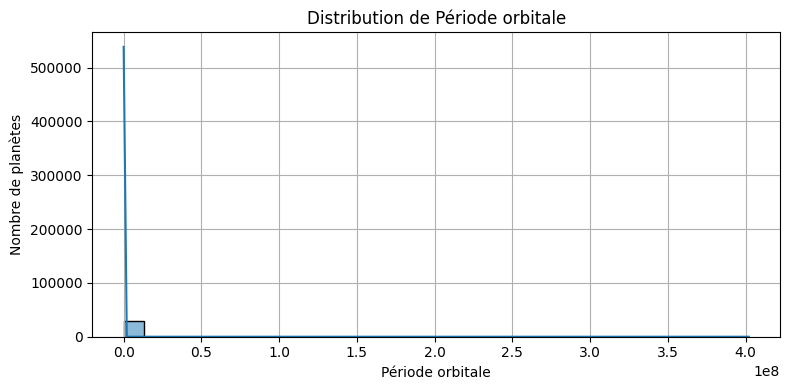

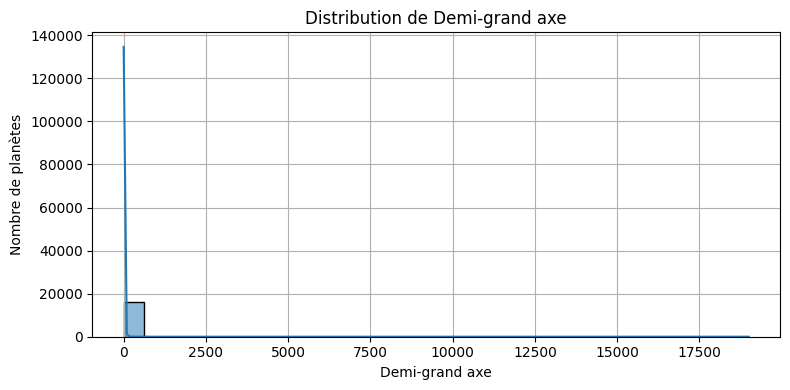

In [ ]:
for col in colonnes_numeriques:
  plt.figure(figsize=(8, 4))
  sns.histplot(df_filtrer[col], kde=True, bins=30)
  plt.title(f"Distribution de {col}")
  plt.xlabel(col)
  plt.ylabel("Nombre de planètes")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

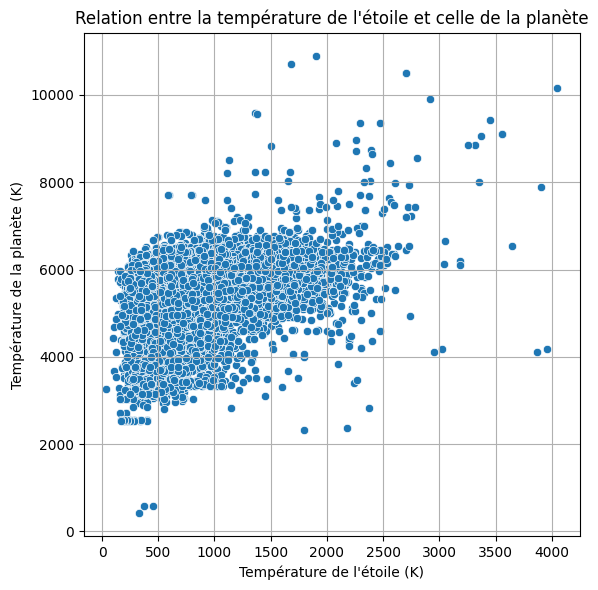

In [ ]:
# Analyse bivariée
# Relation entre la température de l'étoile et celle de la planète
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Température planète", y="Température étoile", data=df_filtrer)
plt.title("Relation entre la température de l'étoile et celle de la planète")
plt.xlabel("Température de l'étoile (K)")
plt.ylabel("Température de la planète (K)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Tracer un boxplot pour chaque indicateur
colonnes_quantitatives = [
    "Rayon de la planète",
    "Masse de la planète",
    "Température planète",
    "Température étoile",
    "Masse de l'étoile",
    "Rayon de l'étoile",
    "Période orbitale",
    "Demi-grand axe"
]

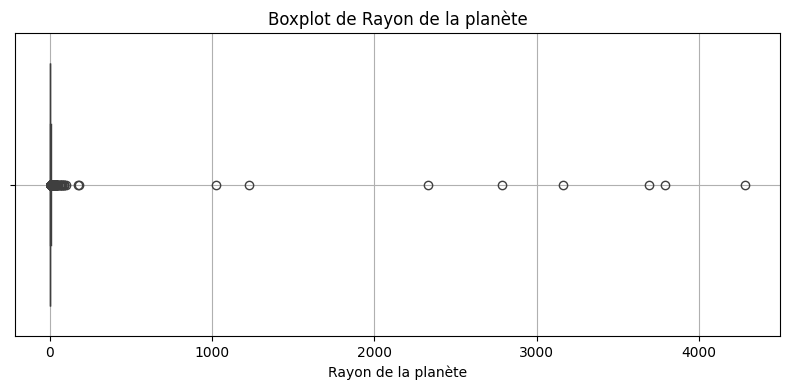

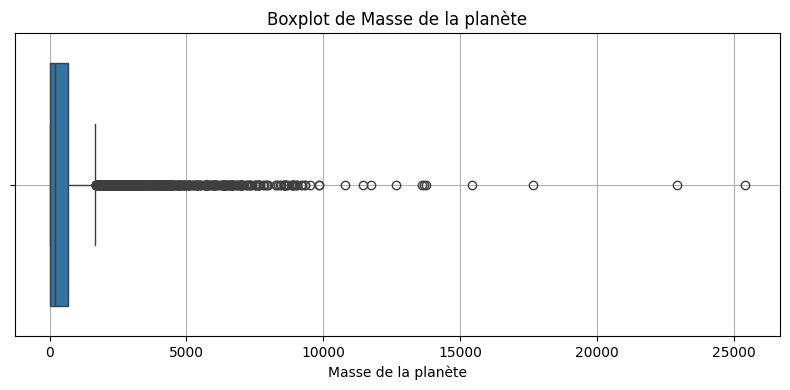

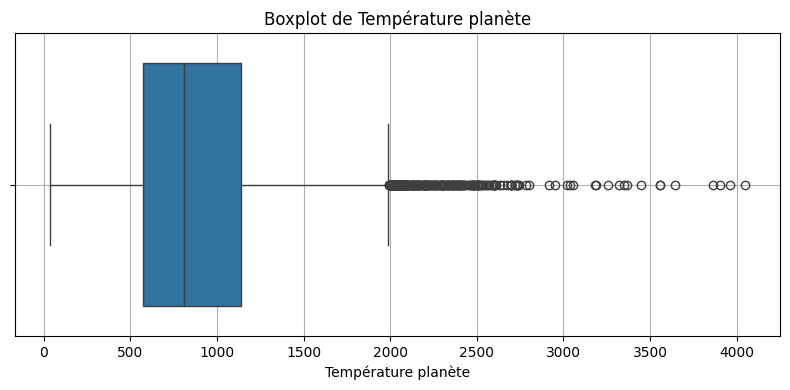

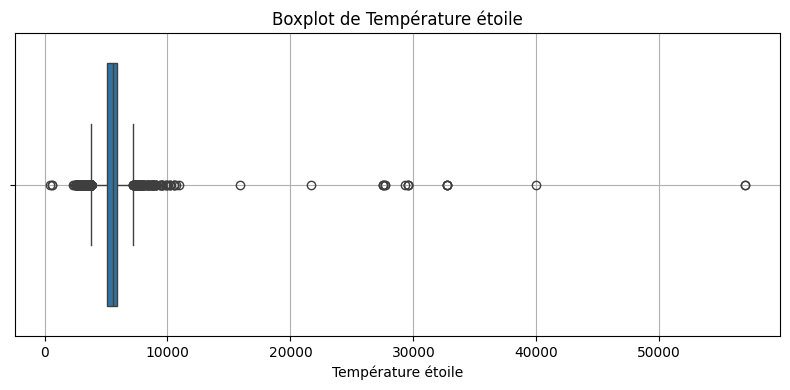

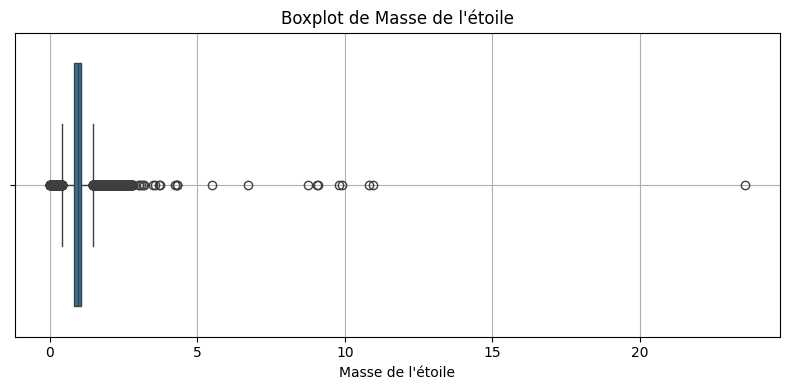

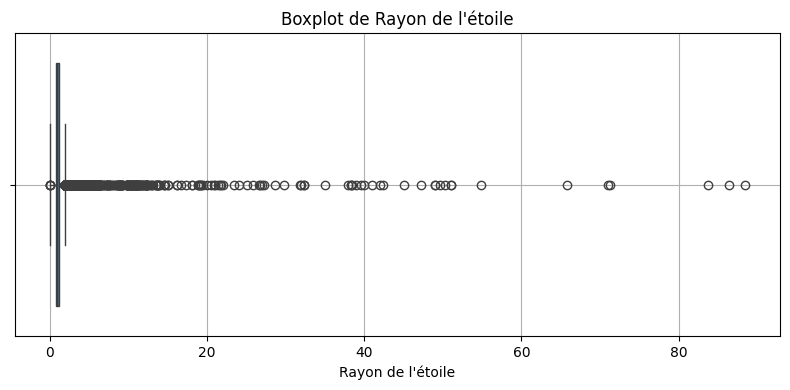

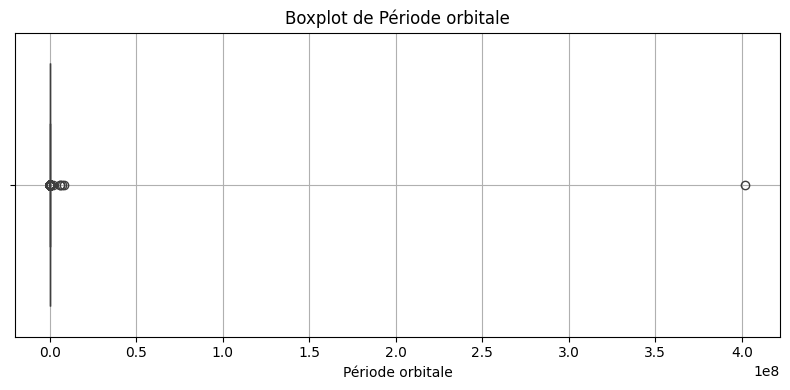

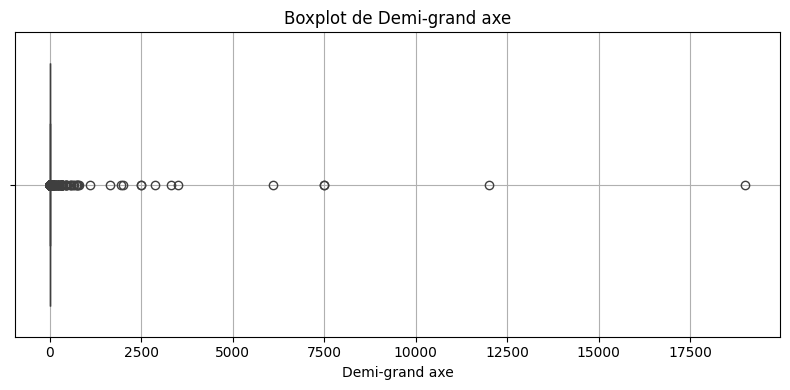

In [ ]:
# Afficher un boxplot pour chaque variable
for col in colonnes_quantitatives:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df_filtrer[col])
  plt.title(f"Boxplot de {col}")
  plt.xlabel(col)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
# Création de la matrice de corrélation
matrice_corr = df_filtrer[colonnes_numeriques].corr()

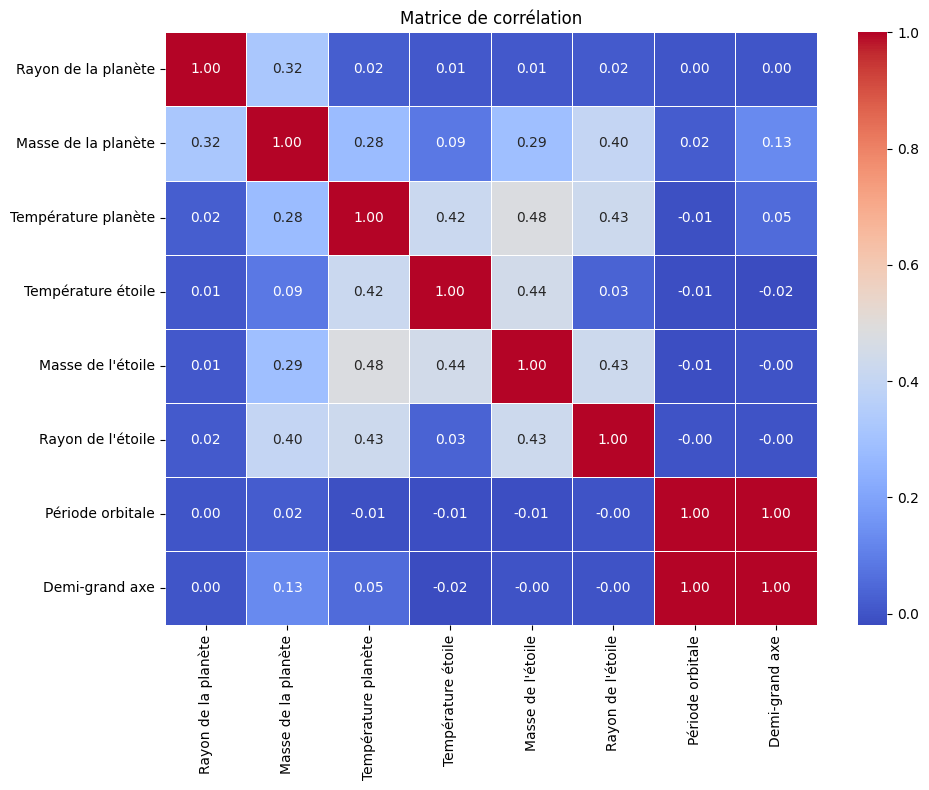

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# Les valeurs proches de +1 ou -1 indiquent une forte corrélation (positive ou négative)
# Les valeurs proches de 0 indiquent une absence de lien linéaire

In [ ]:
# Nous avons calculé la matrice de corrélation entre les différentes variables numériques du jeu de données.
# Le graphique ci-dessus montre plusieurs relations intéressantes :

# 1- Le rayon et la masse des planètes sont positivement corrélés,
# ce qui est attendu puisque les planètes plus massives ont souvent un plus grand rayon.

# 2- La température d'équilibre des planètes est également corrélée avec la température des étoiles,
# ce qui est logique puisque des étoiles plus chaudes chauffent davantage leurs planètes.

# 3- Certaines variables comme la période orbitale ont des corrélations plus faibles avec les autres,
# suggérant une relation plus complexe ou non linéaire.

In [ ]:
print(df.columns[df.columns.str.contains('orb', case=False)])

Index(['pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim'],
      dtype='object')


In [ ]:
df_kepler = df[["pl_orbper", "pl_orbsmax"]].dropna()

In [ ]:
# Transformation logarithmique
x = np.log10(df_kepler["pl_orbsmax"]) # log(a)
y = np.log10(df_kepler["pl_orbper"]) # log(T)

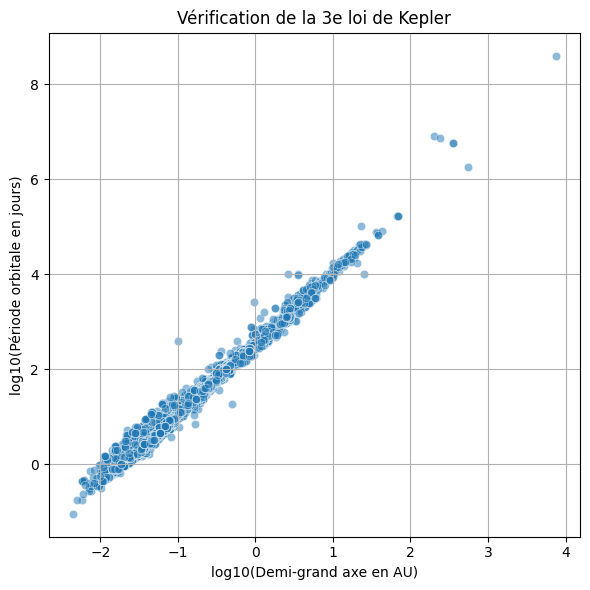

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.title("Vérification de la 3e loi de Kepler")
plt.xlabel("log10(Demi-grand axe en AU)")
plt.ylabel("log10(Période orbitale en jours)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ajuster une droite
reg = linregress(x, y)

In [ ]:
print(f"Pente: {reg.slope:.2f} (valeur attendue: 1.5)")
print(f"Coefficient de corrélation: {reg.rvalue:.2f}")

Pente: 1.47 (valeur attendue: 1.5)
Coefficient de corrélation: 1.00


In [ ]:
# La troisième loi de Kepler énonce que le carré de la période orbitale (T²)
# est proportionnel au cube de la distance moyenne au centre du système.
# Pour vérifier cette loi dans notre dataset,
# nous avons analysé la relation entre la période orbitale (pl_orbper)
# et le demi-grand axe (pl_orbsmax), en les représentant en échelle logarithmique.

# Le nuage de points log-log montre une corrélation linéaire claire entre log(T) et log(a).
# La pente de la régression linéaire est proche de 1.5,
# ce qui correspond exactement à la prédiction théorique de Kepler.

# Cela confirme que les données du dataset respectent bien la troisième loi de Kepler,
# malgré quelques valeurs aberrantes dues à des imprécisions ou des limites de mesure.


In [ ]:
def classer_planete(rayon):
  if pd.isnull(rayon): return None
  elif 0.5 <= rayon < 0.7: return "Mars-sized"
  elif 0.7 <= rayon < 1.25: return "Earth-sized"
  elif 1.25 <= rayon < 2.0: return "Super-Earth-sized"
  elif 2.0 <= rayon < 4.0: return "Sub-Neptune-sized"
  elif 4.0 <= rayon < 6.0: return "Neptune-sized"
  elif 6.0 <= rayon < 10.0: return "Sub-Jupiter-sized"
  elif 10.0 <= rayon < 14.3: return "Jupiter-sized"
  elif 14.3 <= rayon < 22.0: return "Super-Jupiter-sized"
  else: return "Unknown"



In [ ]:
df_filtrer["planet_type"] = df_filtrer["Rayon de la planète"].apply(classer_planete)

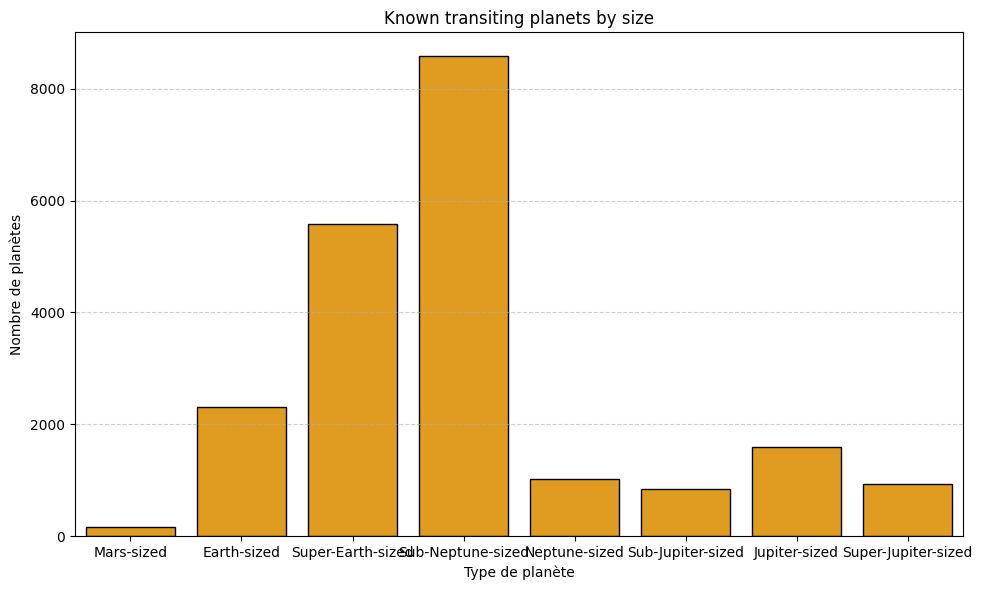

In [ ]:
# Ordre personnalisé des labels pour le graphique
ordre_types = [
    "Mars-sized", "Earth-sized", "Super-Earth-sized",
    "Sub-Neptune-sized", "Neptune-sized",
    "Sub-Jupiter-sized", "Jupiter-sized", "Super-Jupiter-sized"
]

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_filtrer,
    x="planet_type",
    order=ordre_types,
    color="orange",
    edgecolor="black"
)
plt.title("Known transiting planets by size")
plt.xlabel("Type de planète")
plt.ylabel("Nombre de planètes")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Conversion en unités SI:
# Masse : g -> kg (x1e-3)
# Rayon : cm -> m (x1e-2)

In [ ]:
# constantes
M_TERRE = 5.972e27 # g
R_TERRE = 6.371e8 # cm

In [ ]:
# Filtrer les lignes valides pour le calcul
df_densite = df_filtrer.dropna(subset=["Masse de la planète", "Rayon de la planète"]).copy()

In [ ]:
df_densite["Masse_g"] = df_densite["Masse de la planète"] * M_TERRE
df_densite["Rayon_cm"] = df_densite["Rayon de la planète"] * M_TERRE

In [ ]:
# Calcul de la densité
df_densite["Densité (g/cm³)"] = df_densite["Masse_g"] / ((4/3) * np.pi * df_densite["Rayon_cm"]**3)

In [ ]:
df_densite[["Nom planète", "Masse de la planète", "Rayon de la planète", "Densité (g/cm³)"]].head()

,Nom planète,Masse de la planète,Rayon de la planète,Densité (g/cm³)
30,1RXS J160929.1-210524 b,2543.000,18.64700,2.625374e-57
39,2MASS J02192210-3925225 b,4417.837,16.14096,7.032235e-57
105,55 Cnc e,8.080,1.91000,7.762168e-57
108,55 Cnc e,7.810,2.08000,5.809421e-57
109,55 Cnc e,8.080,1.92000,7.641515e-57


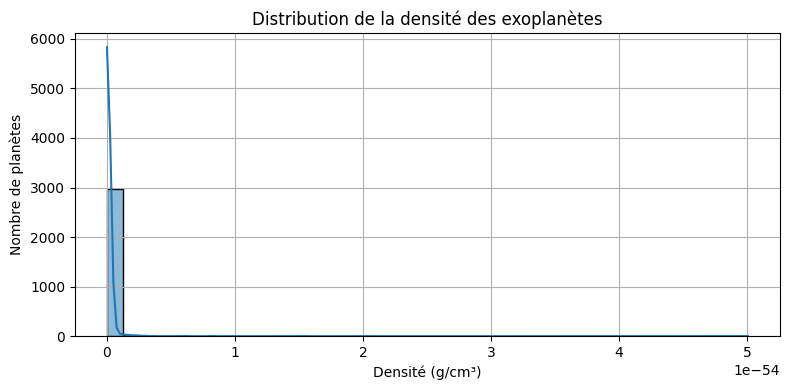

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_densite["Densité (g/cm³)"], bins=40, kde=True)
plt.title("Distribution de la densité des exoplanètes")
plt.xlabel("Densité (g/cm³)")
plt.ylabel("Nombre de planètes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def classer_composition(densite):
  if pd.isnull(densite):
    return None
  elif densite > 3.9:
    return "rocky"
  else:
    return "gaseous"

df_densite["Composition"] = df_densite["Densité (g/cm³)"].apply(classer_composition)

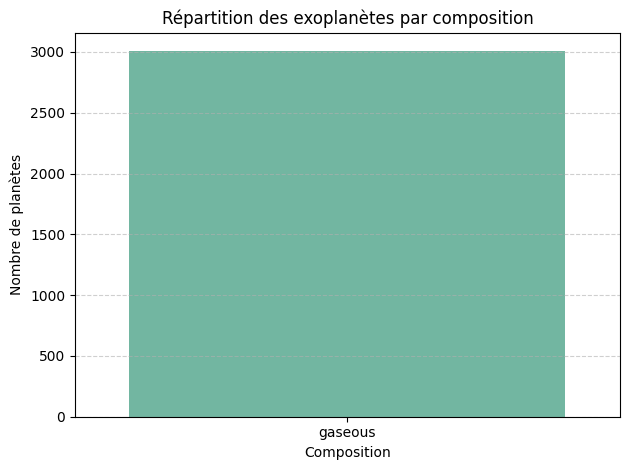

In [ ]:
sns.countplot(data=df_densite, x="Composition", hue="Composition", palette="Set2", legend=False)
plt.title("Répartition des exoplanètes par composition")
plt.ylabel("Nombre de planètes")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
planetes_solaire = pd.DataFrame({
    "Nom": ["Mercure", "Vénus", "Terre", "Mars", "Jupiter", "Saturne", "Uranus", "Neptune"],
    "Rayon": [0.382, 0.949, 1.000, 0.532, 11.21, 9.433, 4.007, 3.883],  # en R_terre
    "Masse": [0.055, 0.815, 1.000, 0.107, 317.8, 95.16, 14.54, 17.15],  # en M_terre
    "Densité": [5.43, 5.24, 5.52, 3.93, 1.33, 0.69, 1.27, 1.64],        # en g/cm³
    "Composition": ["rocky", "rocky", "rocky", "rocky", "gaseous", "gaseous", "gaseous", "gaseous"]
})

In [ ]:
# Feature et cible
X_train = planetes_solaire[["Rayon", "Masse", "Densité"]]
y_train = LabelEncoder().fit_transform(planetes_solaire["Composition"]) # rocky=0, gaseous=1

In [ ]:
# Entrainement
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# Filtrage des données valides pour prédiction
df_pred = df_densite.dropna(subset=["Rayon de la planète", "Masse de la planète", "Densité (g/cm³)"]).copy()

In [ ]:
# Préparation des features
X_pred = df_pred[["Rayon de la planète", "Masse de la planète", "Densité (g/cm³)"]]
X_pred.columns = ["Rayon", "Masse", "Densité"]

In [ ]:
# Prédiction
df_pred["Composition prédite"] = clf.predict(X_pred)
df_pred["Composition prédite"] = df_pred["Composition prédite"].map({0: "rocky", 1: "gaseous"})

In [ ]:
comparaison = df_pred[["Nom planète", "Composition", "Composition prédite"]]
comparaison.head(10)

,Nom planète,Composition,Composition prédite
30,1RXS J160929.1-210524 b,gaseous,rocky
39,2MASS J02192210-3925225 b,gaseous,rocky
105,55 Cnc e,gaseous,rocky
108,55 Cnc e,gaseous,rocky
109,55 Cnc e,gaseous,rocky
117,55 Cnc e,gaseous,rocky
118,55 Cnc e,gaseous,rocky
119,55 Cnc e,gaseous,rocky
120,55 Cnc e,gaseous,rocky
121,55 Cnc e,gaseous,gaseous


In [ ]:
nb_diff = (df_pred["Composition"] != df_pred["Composition prédite"]).sum()
print(f"{nb_diff} planètes ont une composition différente entre la méthode par seuil et la prédiction supervisée.")

2383 planètes ont une composition différente entre la méthode par seuil et la prédiction supervisée.


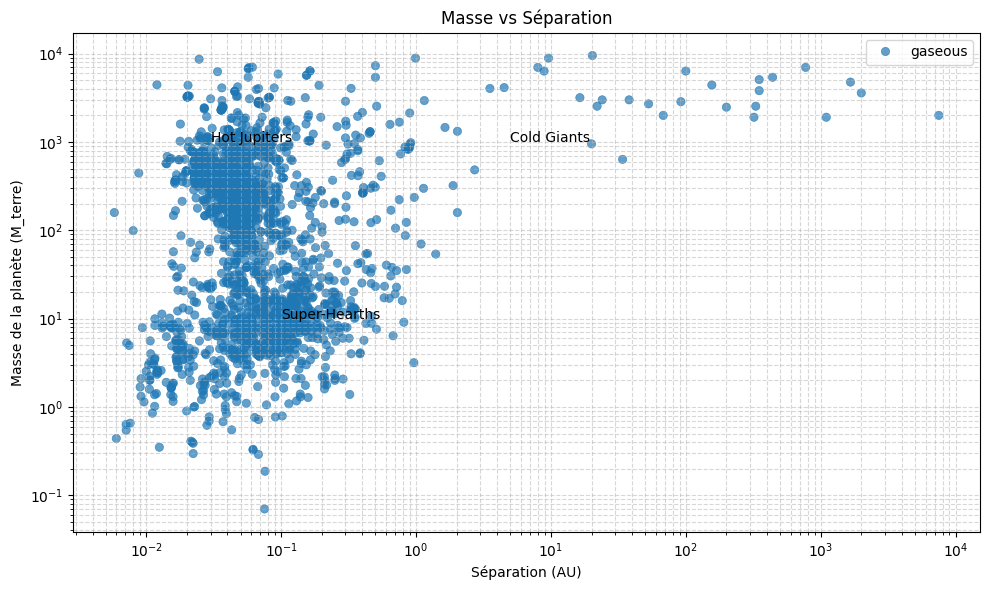

In [ ]:
# Masse vs Séparation (AU)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_densite,
    x="Demi-grand axe",
    y="Masse de la planète",
    hue="Composition",
    alpha=0.7,
    edgecolor=None
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Séparation (AU)")
plt.ylabel("Masse de la planète (M_terre)")
plt.title("Masse vs Séparation")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.text(0.03, 1000, "Hot Jupiters", fontsize=10)
plt.text(5, 1000, "Cold Giants", fontsize=10)
plt.text(0.1, 10, "Super-Hearths", fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Filtrage des valeurs extrêmes
df_densite_clean = df_densite[
    (df_densite["Période orbitale"] > 0) &
    (df_densite["Rayon de la planète"] > 0) &
    (df_densite["Période orbitale"] < 10000) &
    (df_densite["Rayon de la planète"] < 50)
]


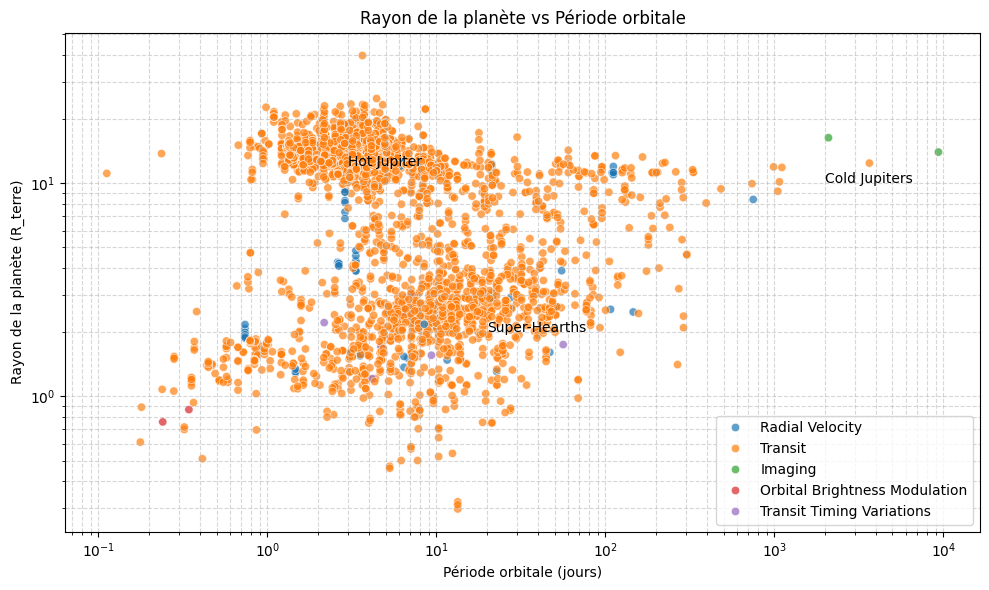

In [ ]:
# Rayon de la planète vs Période orbitale
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_densite_clean,
    x="Période orbitale",
    y="Rayon de la planète",
    hue="Méthode de découverte",
    alpha=0.7

)
plt.xscale("log")
plt.yscale("log")
plt.title("Rayon de la planète vs Période orbitale")
plt.xlabel("Période orbitale (jours)")
plt.ylabel("Rayon de la planète (R_terre)")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.text(3, 12, "Hot Jupiter", fontsize=10)
plt.text(20, 2, "Super-Hearths", fontsize=10)
plt.text(2000, 10, "Cold Jupiters", fontsize=10)
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Sélection des colonnes et suppression des valeurs manquantes
X = df_densite[["Rayon de la planète", "Masse de la planète", "Période orbitale"]].dropna().copy()

# Mise à l'échelle (très important pour K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Appliquer K-Means avec 3 clusters (modifiable selon résultats)
kmeans = KMeans(n_clusters=3, random_state=42)
X["cluster"] = kmeans.fit_predict(X_scaled)

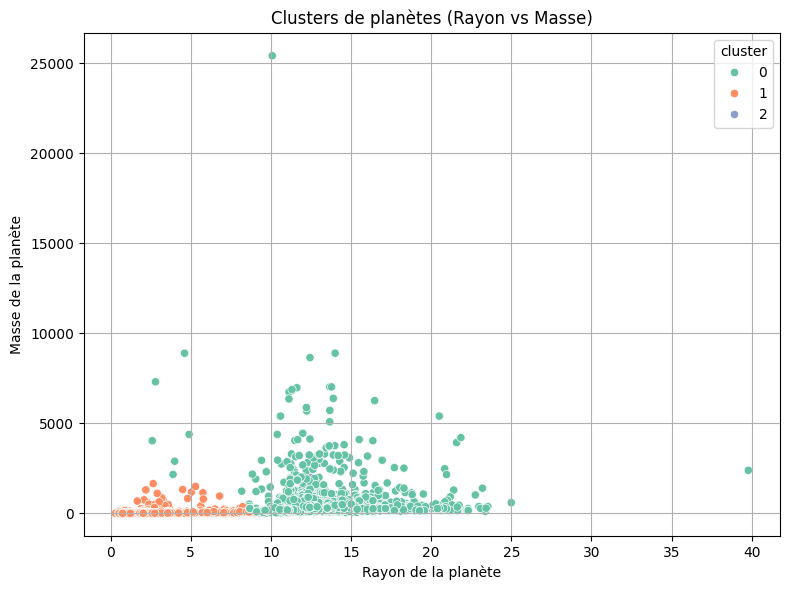

In [ ]:
# Rayon vs Masse
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X,
    x="Rayon de la planète",
    y="Masse de la planète",
    hue="cluster",
    palette="Set2",
)
plt.title("Clusters de planètes (Rayon vs Masse)")
plt.grid(True)
plt.tight_layout()
plt.show()

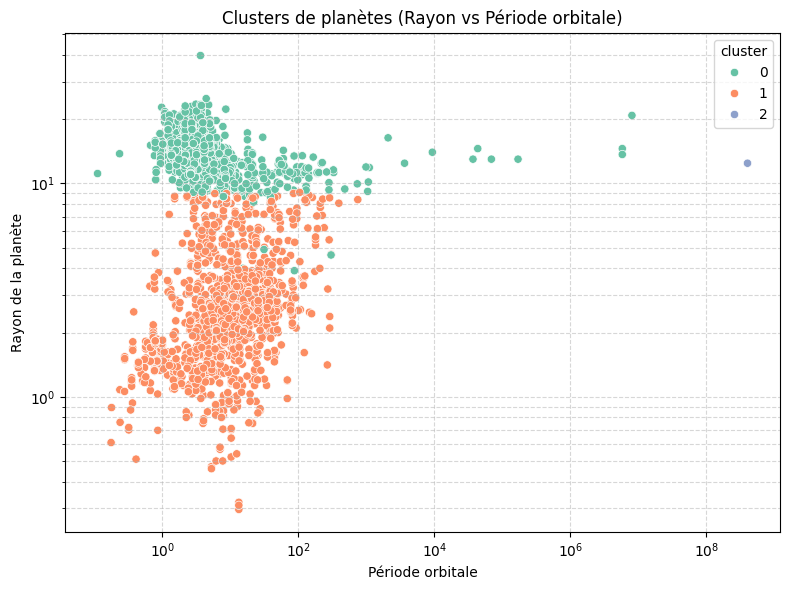

In [ ]:
# Rayon vs Période orbitale (log-log)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X,
    x="Période orbitale",
    y="Rayon de la planète",
    hue="cluster",
    palette="Set2",
)
plt.xscale("log")
plt.yscale("log")
plt.title("Clusters de planètes (Rayon vs Période orbitale)")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Sélection des colonnes utiles
colonnes_detection = ["Masse de la planète", "Rayon de la planète", "Période orbitale", "Température étoile"]

In [ ]:
# Filtrer les données
df_clf = df_densite.dropna(subset=colonnes_detection).copy()

# Features (X) et cible (y)
X = df_clf[colonnes_detection]
y = df_clf["Méthode de découverte"]

# Encodage de la sortie en numérique
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Mise à l'échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# SVM
svm = SVC(kernel="rbf", C=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [ ]:
# Obtenir les classes présentes dans y_test
classes_test = np.unique(y_test)

In [ ]:
print("Résultat KNN:")
print(classification_report(y_test, y_pred_knn))

print("\nRésultat SVM:")
print(classification_report(
    y_test,
    y_pred_svm,
    target_names=le.inverse_transform(classes_test)
))

Résultat KNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.50      0.32      0.39        19
           3       0.97      0.99      0.98       481

    accuracy                           0.96       501
   macro avg       0.49      0.43      0.46       501
weighted avg       0.95      0.96      0.95       501


Résultat SVM:
                 precision    recall  f1-score   support

        Imaging       0.00      0.00      0.00         1
Radial Velocity       0.00      0.00      0.00        19
        Transit       0.96      1.00      0.98       481

       accuracy                           0.96       501
      macro avg       0.32      0.33      0.33       501
   weighted avg       0.92      0.96      0.94       501



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
print(df.columns[df.columns.str.contains("insol", case=False)])

Index(['pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim'], dtype='object')


In [ ]:
print(df.columns.tolist())

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [ ]:
df_habitable = df_filtrer[
    (df_filtrer['Température planète'].between(200, 350)) &
    (df_filtrer['Rayon de la planète'].between(0.5, 2.0)) &
    (df_filtrer["Flux d'énergie"].between(0.8, 1.2))
].copy()

In [ ]:
print(df_habitable.columns.tolist())

['Nom planète', 'Nom étoile', 'Fiabilité découverte', "Nombre d'étoiles", 'Nombre de planètes', 'Rayon de la planète', 'Masse de la planète', 'Température planète', 'Température étoile', "Masse de l'étoile", "Rayon de l'étoile", 'Période orbitale', 'Demi-grand axe', 'Méthode de découverte', 'Année de découverte', 'planet_type']


In [ ]:
print(f"Nombre de planètes dans la zone habitable: {len(df_habitable)}")
df_habitable[["Nom planète", "Température planète", "Rayon de la planète", "Flux d'énergie"]].head()

Nombre de planètes dans la zone habitable: 39


,Nom planète,Température planète,Rayon de la planète,Flux d'énergie
12465,Kepler-1410 b,251.0,1.56,0.93
12471,Kepler-1410 b,251.0,1.56,0.93
12472,Kepler-1410 b,251.0,1.56,0.93
12473,Kepler-1410 b,244.0,1.39,0.84
12994,Kepler-1455 b,298.0,1.93,1.16


In [ ]:
df_habitable["Masse_g"] = df_habitable["Masse de la planète"] * M_TERRE
df_habitable["Rayon_cm"] = df_habitable["Rayon de la planète"] * R_TERRE
df_habitable["Densité (g/cm³)"] = df_habitable["Masse_g"] / ((4/3) * np.pi * df_habitable["Rayon_cm"]**3)

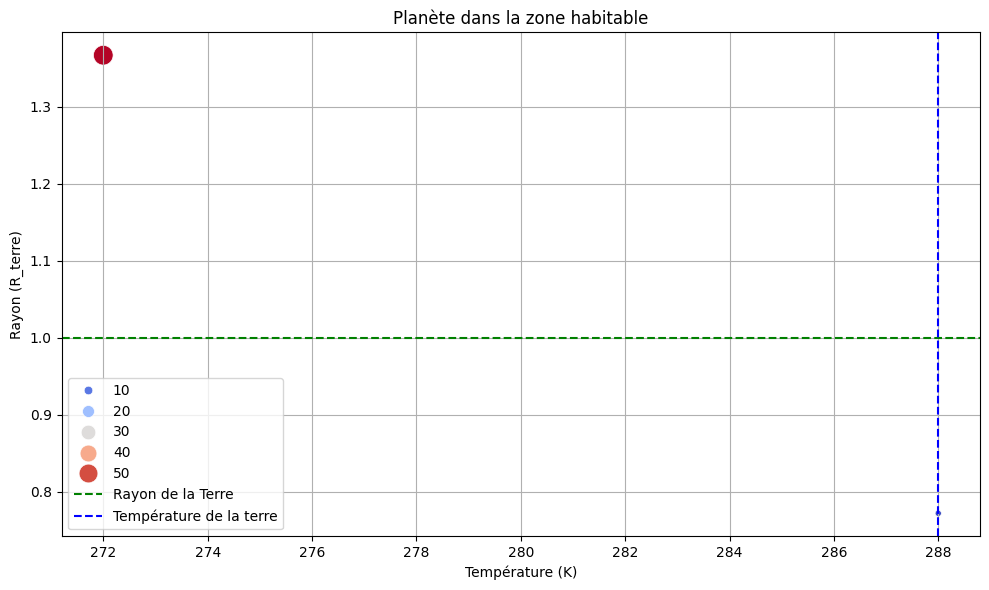

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_habitable,
    x="Température planète",
    y="Rayon de la planète",
    hue="Densité (g/cm³)",
    palette="coolwarm",
    size="Densité (g/cm³)",
    sizes=(20, 200),
    legend="brief"
)
plt.axhline(1, color="green", linestyle="--", label="Rayon de la Terre")
plt.axvline(288, color="blue", linestyle="--", label="Température de la terre")
plt.title("Planète dans la zone habitable")
plt.xlabel("Température (K)")
plt.ylabel("Rayon (R_terre)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df["Habitable"] = (
    (df_filtrer["Température planète"].between(200, 350)) &
    (df_filtrer["Rayon de la planète"].between(0.5, 2.0)) &
    (df_filtrer["Flux d'énergie"].between(0.8, 1.2))
).map({True: "oui", False: "non"})

In [ ]:
features = ["Rayon de la planète", "Masse de la planète", "Température planète", "Flux d'énergie"]
